# Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tqdm.notebook import tqdm
import random

# Exercise 5.2

In [17]:
def H(spins, J, h):
    N = len(spins)
    L = int(N**0.5)  # Assuming spins is a flattened LxL 2D square lattice
    H = 0
    for i in range(N):
        # Map 1D index to 2D coordinates
        x, y = i % L, i // L

        # Get current spin
        s = spins[i]

        # Horizontal neighbor (right, periodic boundary)
        s_right = spins[y * L + (x + 1) % L]

        # Vertical neighbor (down, periodic boundary)
        s_down = spins[((y + 1) % L) * L + x]

        # Contribution from nearest neighbors and external field
        H += -J * s * s_right - J * s * s_down - h * s

    return H


In [18]:
def delta_H(spins, J, h, x, L):
    # Get the coordinates of the site in the 2D lattice
    i, j = x // L, x % L

    # Current spin value at site x
    s = spins[x]

    # Indices of the neighboring spins with periodic boundaries
    right = i * L + (j + 1) % L  # Right neighbor
    left = i * L + (j - 1) % L  # Left neighbor
    up = ((i - 1) % L) * L + j  # Upper neighbor
    down = ((i + 1) % L) * L + j  # Lower neighbor

    # Contribution from neighbors and external field
    neighbor_interactions = (
        spins[right] + spins[left] + spins[up] + spins[down]
    )

    # Change in energy from flipping spin at site x
    delta_H = 2 * J * s * neighbor_interactions + 2 * h * s

    return delta_H


In [19]:
def metropolis_ising(spins, J, h, beta, L, sweeps):
    N = L * L  # Total number of spins

    for _ in range(sweeps):
        for _ in range(N):  # One sweep = N single spin updates
            # Randomly select a spin to flip
            x = random.randint(0, N - 1)

            # Compute the change in energy ΔH for flipping the spin
            ΔH = delta_H(spins, J, h, x, L)

            # Metropolis acceptance criterion
            if ΔH <= 0 or random.random() < np.exp(-beta * ΔH):
                # Flip the spin
                spins[x] *= -1

    return spins


# Example usage
if __name__ == "__main__":
    # Parameters
    L = 10  # Lattice size (10x10)
    J = 1.0  # Coupling constant
    h = 0.0  # External magnetic field
    beta = 0.5  # Inverse temperature
    sweeps = 1000  # Number of sweeps

    # Initialize random spin configuration
    spins = np.random.choice([-1, 1], size=(L * L))

    # Run Metropolis-Hastings
    final_spins = metropolis_ising(spins, J, h, beta, L, sweeps)

    # Reshape to 2D lattice for visualization
    lattice = final_spins.reshape((L, L))
    print("Final spin configuration:")
    print(lattice)


Final spin configuration:
[[ 1  1  1  1  1 -1  1  1  1  1]
 [ 1  1  1  1  1 -1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1 -1  1  1  1  1  1]
 [ 1  1  1  1 -1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]]


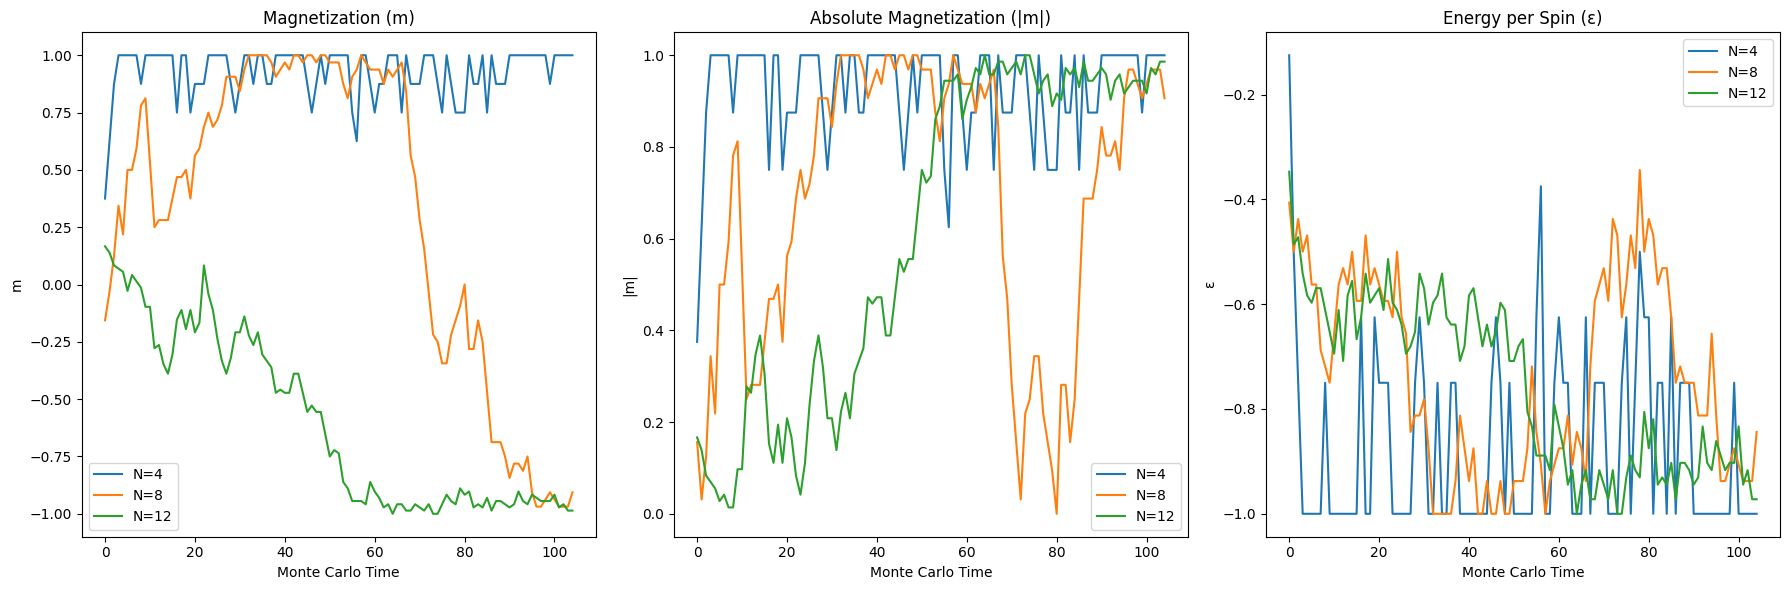

In [21]:
def metropolis_ising(spins, J, h, beta, L, steps):
    N = L * L  # Total number of spins
    m_history = []
    abs_m_history = []
    epsilon_history = []

    for _ in range(steps):
        for _ in range(N):  # Attempt to flip each spin once (on average)
            x = random.randint(0, N - 1)
            ΔH = delta_H(spins, J, h, x, L)
            if ΔH <= 0 or random.random() < np.exp(-beta * ΔH):
                spins[x] *= -1

        # Measure magnetization and energy
        m = np.sum(spins) / N
        abs_m = abs(m)
        epsilon = compute_energy(spins, J, h, L) / N

        # Store values
        m_history.append(m)
        abs_m_history.append(abs_m)
        epsilon_history.append(epsilon)

    return m_history, abs_m_history, epsilon_history


def delta_H(spins, J, h, x, L):
    i, j = x // L, x % L
    s = spins[x]
    right = i * L + (j + 1) % L
    left = i * L + (j - 1) % L
    up = ((i - 1) % L) * L + j
    down = ((i + 1) % L) * L + j
    neighbor_interactions = spins[right] + spins[left] + spins[up] + spins[down]
    return 2 * J * s * neighbor_interactions + 2 * h * s


def compute_energy(spins, J, h, L):
    N = L * L
    energy = 0
    for x in range(N):
        i, j = x // L, x % L
        right = i * L + (j + 1) % L
        down = ((i + 1) % L) * L + j
        energy -= J * spins[x] * (spins[right] + spins[down])
        energy -= h * spins[x]
    return energy


# Parameters
J = 0.5
h = 0.0
beta = 1.0  # Inverse temperature
steps = 105
Ns = [4, 8, 12]

# Generate data
histories = {}
for N in Ns:
    L = N
    spins = np.random.choice([-1, 1], size=(L * L))
    m_hist, abs_m_hist, epsilon_hist = metropolis_ising(spins, J, h, beta, L, steps)
    histories[N] = (m_hist, abs_m_hist, epsilon_hist)

# Plotting
time = np.arange(steps)

plt.figure(figsize=(18, 6))

# Plot magnetization m
plt.subplot(1, 3, 1)
for N in Ns:
    plt.plot(time, histories[N][0], label=f'N={N}')
plt.title('Magnetization (m)')
plt.xlabel('Monte Carlo Time')
plt.ylabel('m')
plt.legend()

# Plot absolute magnetization |m|
plt.subplot(1, 3, 2)
for N in Ns:
    plt.plot(time, histories[N][1], label=f'N={N}')
plt.title('Absolute Magnetization (|m|)')
plt.xlabel('Monte Carlo Time')
plt.ylabel('|m|')
plt.legend()

# Plot energy per spin ε
plt.subplot(1, 3, 3)
for N in Ns:
    plt.plot(time, histories[N][2], label=f'N={N}')
plt.title('Energy per Spin (ε)')
plt.xlabel('Monte Carlo Time')
plt.ylabel('ε')
plt.legend()

plt.tight_layout()
plt.show()


Magnetization $m$:
* In the Monte Carlo histories, we observe $m$ fluctuating around zero over time. For larger $Ν$, the fluctuations are smaller, and
$m$ stays closer to zero due to averaging over a larger number of spins.
*This matches the theoretical prediction that
$\langle m \rangle=0$ for finite $N$, even in the broken phase.

Absolute magnetization $|m|$:
* For $J>J_{c}$, $∣m∣$ is large on average, indicating the system is in an ordered phase where most spins are aligned. The magnitude of $∣m∣$ tends to increase with $N$, as the system becomes more strongly ordered in the broken phase.
*This is consistent with the expectation of spontaneous symmetry breaking for $J>J_{c}$, even though $\langle m \rangle=0$ due to finite-size effects.

Energy per spin $\epsilon$
* The energy per spin
$\epsilon$ stabilizes quickly to a lower value for larger $N$, reflecting the increased alignment of spins (lower-energy configurations). For smaller $N$, the fluctuations in $\epsilon$ are larger due to the system's smaller size and more significant thermal fluctuations.

According to the plots we created, $m$ fluctuates symmetrically around zero, $|m|$ stabilizes at larger values for $J>J_{c}$, reflecting alignment in the broken phase and $\epsilon$ converges to a lower value as the system stabilizes, indicating the dominance of ordered states with lower energy.

# Exercise 5.3

In [14]:
def autocorrelation_time(data):
    n = len(data)
    mean = np.mean(data)
    variance = np.var(data)
    C = []

    # Compute autocorrelation function
    for lag in range(n):
        cov = np.mean((data[:n - lag] - mean) * (data[lag:] - mean))
        C.append(cov / variance)

    # Normalize C to get Γ
    Gamma = np.array(C) / C[0]

    # Find cutoff T where Γ crosses zero
    T = next((t for t, gamma in enumerate(Gamma) if gamma < 0), len(Gamma))

    # Compute integrated autocorrelation time
    tau = 0.5 + np.sum(Gamma[1:T])
    return tau


# Example Usage
if __name__ == "__main__":
    # Assume histories for m, |m|, and ε are computed for N=8
    J = 0.5
    h = 0.0
    beta = 1.0
    steps = 105
    L = 8  # Test for N=8

    # Generate data
    spins = np.random.choice([-1, 1], size=(L * L))
    m_hist, abs_m_hist, epsilon_hist = metropolis_ising(spins, J, h, beta, L, steps)

    # Compute autocorrelation times
    tau_m = autocorrelation_time(m_hist)
    tau_abs_m = autocorrelation_time(abs_m_hist)
    tau_epsilon = autocorrelation_time(epsilon_hist)

    print("Autocorrelation times:")
    print(f"τ_m = {tau_m}")
    print(f"τ_|m| = {tau_abs_m}")
    print(f"τ_ε = {tau_epsilon}")


Autocorrelation times:
τ_m = 1.5990711063071148
τ_|m| = 1.5990711063071148
τ_ε = 1.514834293925763


The very slow autocorrelation time of
m is not important because, for
$h=0$, the $\mathbb{Z}_{2}$ symmetry ensures that
$\langle m \rangle$ in any finite system, regardless of the sampling dynamicsSince $m$ fluctuates symmetrically around zero, meaningful physical observables like $|m|$ or $\epsilon$, which directly reflect the system's ordering or energy, are unaffected by the slow autocorrelation of
$m$.